In [1]:
%matplotlib inline

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

In [3]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_filteredGpC_less1.csv")    # these are the 'weighted' results
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalpcell_filteredGpC_less1.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalmcell_filteredGpC_less1.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less1.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_filteredGpC_less1.csv")

In [4]:
print(normal_cellA_df.shape)
print(normal_cellB_df.shape)
print(normal_cellC_df.shape)
print(cll_cellA_df.shape)
print(cll_cellC_df.shape)

(126, 7)
(91, 7)
(88, 7)
(66, 7)
(44, 7)


In [5]:
frames1 = [normal_cellA_df, normal_cellB_df, normal_cellC_df]
meth_result = pd.concat(frames1)
meth_result.shape

(305, 7)

In [6]:
meth_result["type"] = str('normal')
meth_result = meth_result.reset_index(drop=True)
normal_result = meth_result

In [7]:
frames2 = [cll_cellA_df, cll_cellC_df]

cll_result = pd.concat(frames2)

In [8]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1)
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1)
print(cll_cellA_df.shape)
print(cll_cellC_df.shape)
print(cll_result.shape)
cll_result["type"] = str('CLL')
cll_result = cll_result.reset_index(drop=True)


(66, 6)
(44, 6)
(110, 7)


In [9]:
print(normal_result.shape)
print(cll_result.shape)

(305, 8)
(110, 8)


In [10]:
combined = normal_result.append(cll_result)

In [11]:
combined = combined.reset_index(drop=True)

In [12]:
combined.head()

,Unnamed: 0,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type
0,0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,0.564824,0.275659,6099466.0,2976807.0,10798881.0,normal
1,1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.516152,0.425323,1746461.0,1439130.0,3383617.0,normal
2,2,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,0.558368,0.295599,5272256.0,2791128.0,9442263.0,normal
3,3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.601974,0.372768,7317.0,4531.0,12155.0,normal
4,4,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,0.601611,0.264696,11918525.0,5243887.0,19811015.0,normal


In [13]:
combined.shape # (414, 8)

(415, 8)

In [14]:
# Remove all data points with less than 100k in totcpg 
combined = combined[combined['total_reads'] > 100000]

In [15]:
combined.shape  # (358, 8), removed 56 files; filtered 304 normal B to 251 files, 112 CCL to 107 files

(359, 8)

In [16]:
normal_result = normal_result[normal_result['total_reads'] > 100000]
cll_result = cll_result[cll_result['total_reads'] > 100000]
print(normal_result.shape)
print(cll_result.shape)

(252, 8)
(107, 8)


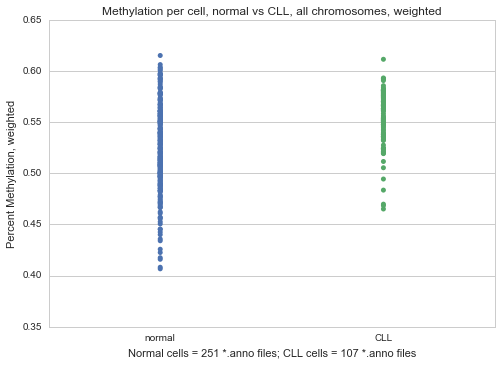

In [17]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined["type"], y=combined["methylation"])
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")

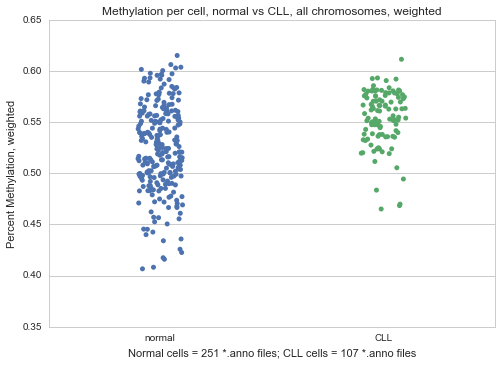

In [18]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined["type"], y=combined["methylation"], jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")


violin plot features a kernel density estimation of the underlying distribution


(0.1, 0.85)

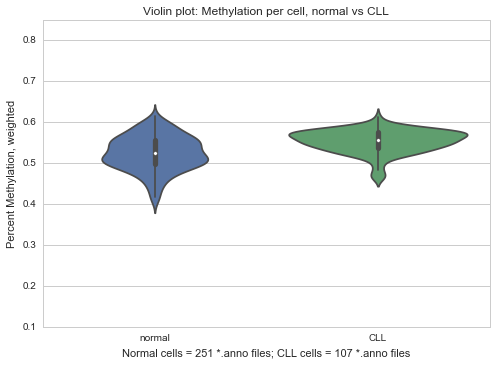

In [19]:
ax = sns.violinplot(x=combined["type"],  y=combined["methylation"])
sns.plt.title("Violin plot: Methylation per cell, normal vs CLL")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
print("violin plot features a kernel density estimation of the underlying distribution")
plt.ylim(0.1, 0.85)

Box whisker plot


(0.1, 0.8)

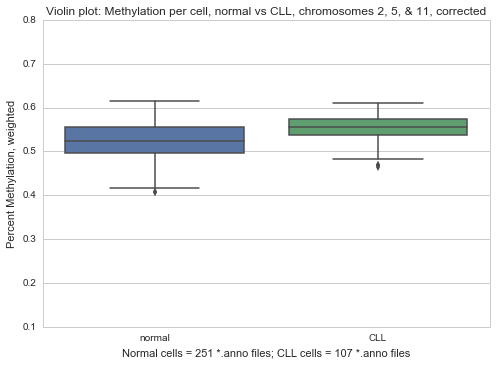

In [20]:
ax = sns.boxplot(x=combined["type"],y=combined["methylation"], linewidth=1.5)
plt.ylim(0.0, 0.85)
sns.plt.title("Violin plot: Methylation per cell, normal vs CLL, chromosomes 2, 5, & 11, corrected")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
print("Box whisker plot")
plt.ylim(0.1, 0.8)


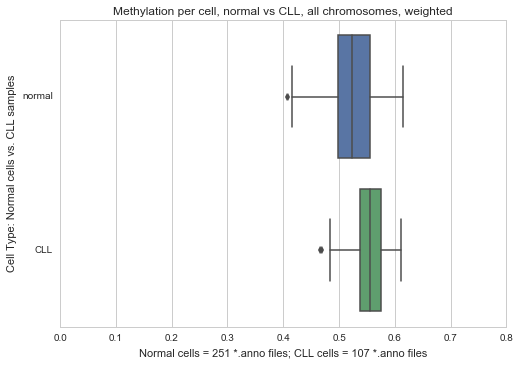

In [21]:
ax = sns.boxplot(y=combined["type"], x=combined["methylation"], linewidth=1.5)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.xlim(0.0, 0.80)
plt.ylabel("Cell Type: Normal cells vs. CLL samples")

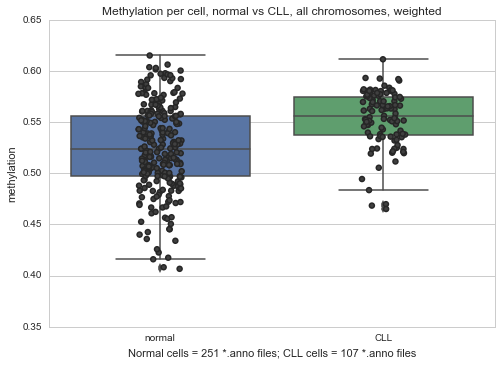

In [22]:
ax = sns.boxplot(x=combined["type"], y=combined["methylation"], linewidth=1.5)
ax = sns.stripplot(x=combined["type"], y=combined["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")

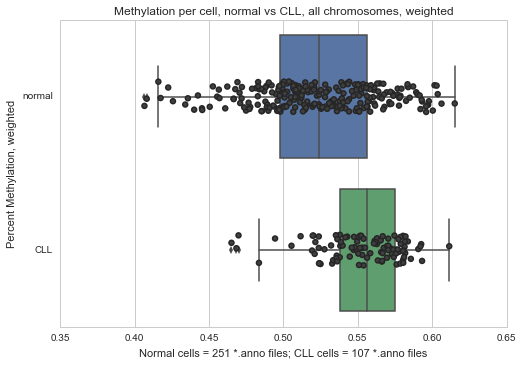

In [23]:
ax = sns.boxplot(y=combined["type"],  x=combined["methylation"], linewidth=1.5)
ax = sns.stripplot(y=combined["type"], x=combined["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")

Swarmplot == categorical scatterplot where the points do not overlap


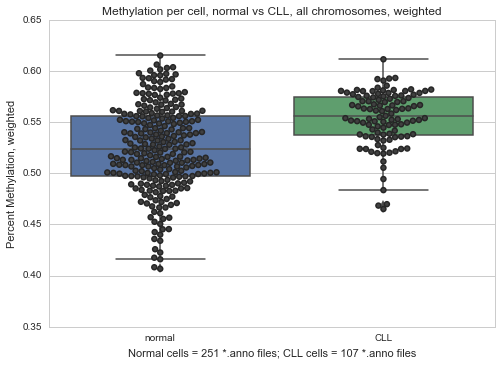

In [24]:
ax = sns.boxplot(x=combined["type"], y=combined["methylation"], linewidth=1.5)
ax = sns.swarmplot(x=combined["type"], y=combined["methylation"], color=".25", linewidth=1.5)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")

print("Swarmplot == categorical scatterplot where the points do not overlap")


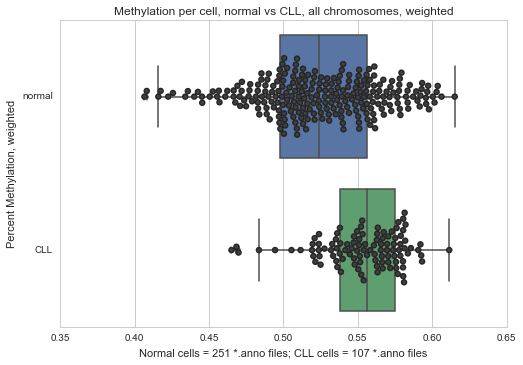

In [25]:
ax = sns.boxplot(y=combined["type"], x=combined["methylation"], linewidth=1.5)
ax = sns.swarmplot(y=combined["type"], x=combined["methylation"], color=".25", linewidth=1.5)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")


In [26]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_ALL.csv")    
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalmcell_ALL.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalpcell_ALL.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_ALL.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_C_ALL.csv")

In [27]:
normal_cellA_df = normal_cellA_df.drop(["Unnamed: 0"], axis=1)  
normal_cellA_df["type"] = str('normal')
normal_cellA_df["bio"] = str('normal_B')
normal_cellA_df["protocol"] = normal_cellA_df["filename"].str[5:24]
normal_cellB_df["type"] = str('normal')
normal_cellB_df = normal_cellB_df.drop(["Unnamed: 0"], axis=1)
normal_cellB_df["type"] = str('normal')
normal_cellB_df["bio"] = str('CD27m')
normal_cellB_df["protocol"] = normal_cellB_df["filename"].str[5:31]
normal_cellC_df = normal_cellC_df.drop(["Unnamed: 0"], axis=1)  
normal_cellC_df["type"] = str('normal')
normal_cellC_df["bio"] = str('CD27p')
normal_cellC_df["protocol"] = normal_cellC_df["filename"].str[5:31]


In [28]:
frames4 = [normal_cellA_df, normal_cellB_df, normal_cellC_df]
normal_result = pd.concat(frames4)

In [29]:
normal_result = normal_result[['filename', 'methylation', 'thisMeth', 'mixedReadCount', 'total_reads', 'type', 'bio', 'protocol']]

In [30]:
normal_result.shape

(304, 8)

In [31]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1) 
cll_cellA_df["type"] = str('CLL')
cll_cellA_df["bio"] = str('CLL')
cll_cellA_df["protocol"] = cll_cellA_df["filename"].str[5:34]
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_CutSmart_proteinase_K_T'] = 'cw154_CutSmart_proteinase_K'
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_Tris_protease_GR_CAGAGA'] = 'cw154_Tris_protease_GR'
cll_cellA_df["protocol"][(cll_cellA_df["protocol"] 
                          != 'cw154_Tris_protease_GR') & (cll_cellA_df["protocol"] != 'cw154_CutSmart_proteinase_K')] = 'cw154_Tris_protease'

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1) 
cll_cellC_df["type"] = str('CLL')
cll_cellC_df["bio"] = str('CLL')
cll_cellC_df["protocol"] = cll_cellC_df["filename"].str[5:17]


In [33]:
frames2 = [cll_cellA_df, cll_cellC_df]
cll_result = pd.concat(frames2)
cll_result.shape

(110, 9)

In [34]:
cll_result = cll_result[['filename', 'methylation', 'thisMeth',  'mixedReadCount', 'total_reads', 'type', 'bio', 'protocol']]

In [35]:
cll_result = cll_result.reset_index(drop=True)
normal_result = normal_result.reset_index(drop=True)
combined2 = normal_result.append(cll_result)
combined2 = combined2.reset_index(drop=True)

In [36]:
# Remove all data points with less than 100k in totcpg 
combined2 = combined2[combined2['total_reads'] > 100000]

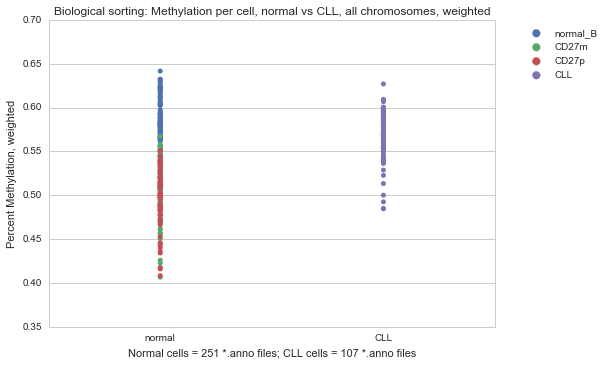

In [37]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Percent Methylation, weighted")

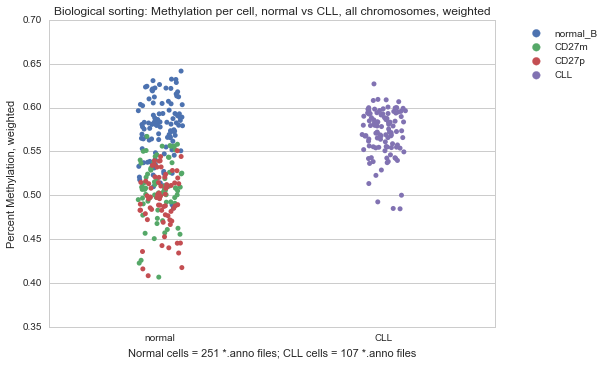

In [38]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


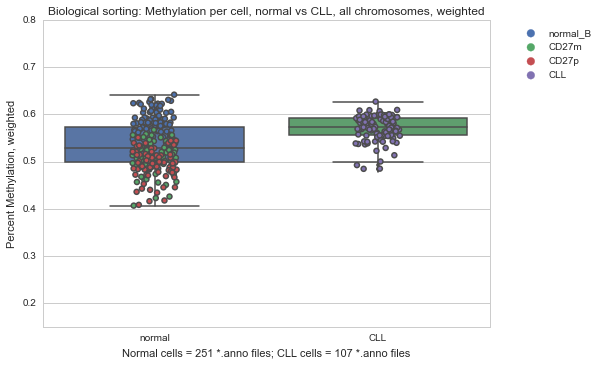

In [39]:
ax = sns.boxplot(x=combined2["type"],y=combined2["methylation"], linewidth=1.5)
plt.ylim(0.15,0.8)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


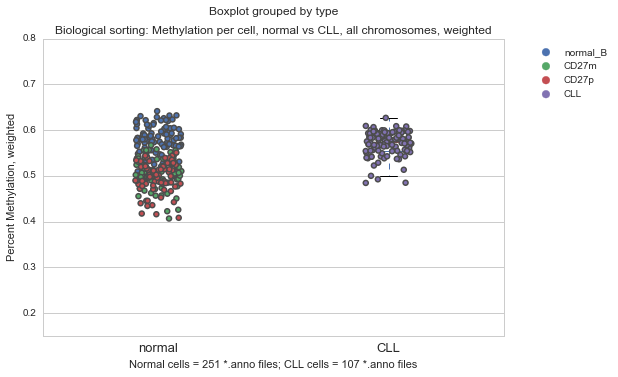

In [40]:
combined2.boxplot(column = 'methylation', by='type', fontsize=13)
plt.ylim(0.15,0.8)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


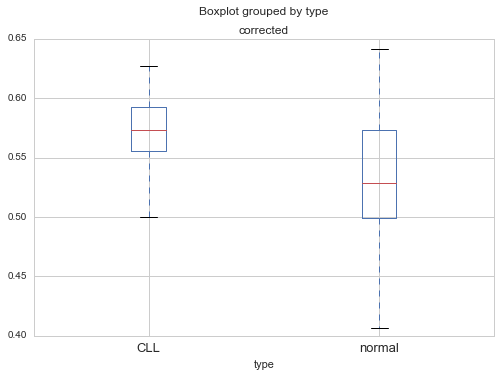

In [41]:
combined2.boxplot(column = 'methylation', by='type', fontsize=13)
plt.title('corrected')

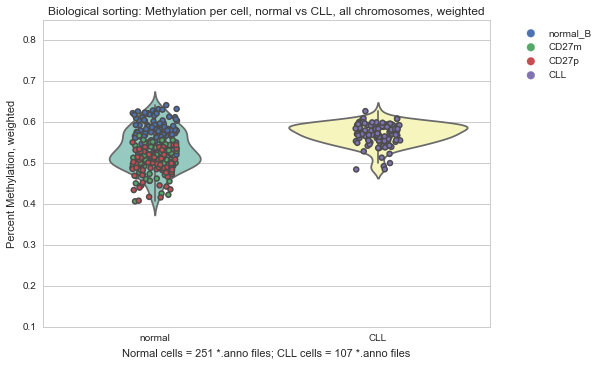

In [42]:
ax = sns.violinplot(x=combined2["type"],y=combined2["methylation"], palette="Set3")
plt.ylim(0.1,0.85)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

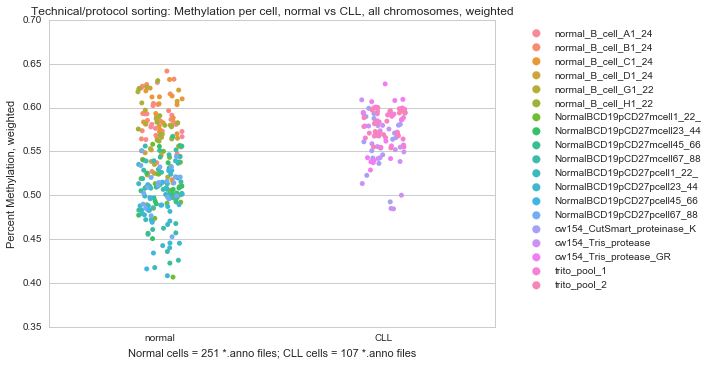

In [43]:
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.protocol, jitter=True)
sns.plt.title("Technical/protocol sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


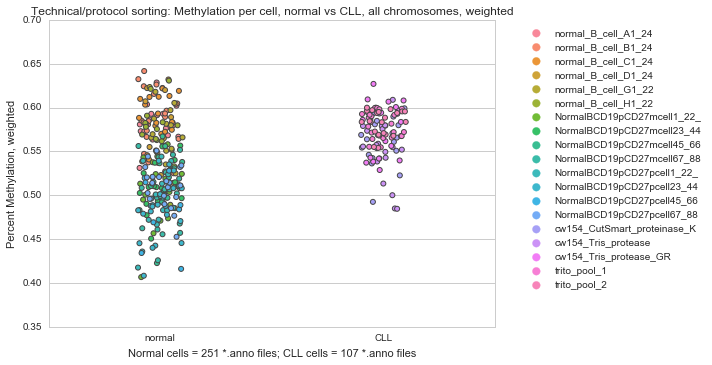

In [44]:
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"],y=combined2["methylation"], hue=combined2.protocol, jitter=True, linewidth=1.0)
sns.plt.title("Technical/protocol sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

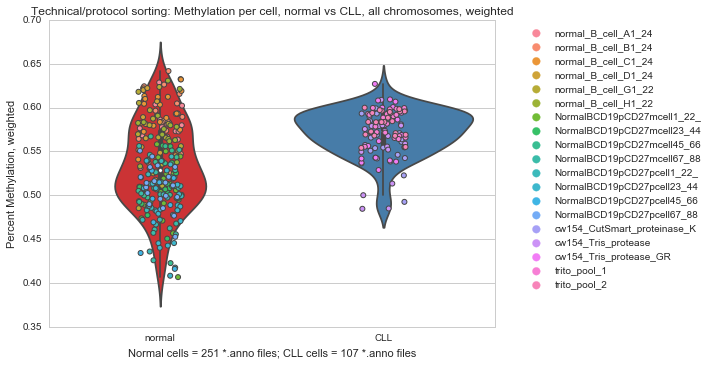

In [45]:
ax = sns.violinplot(x=combined2["type"], y=combined2["methylation"], palette="Set1")
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.protocol, jitter=True, linewidth=1.0)
sns.plt.title("Technical/protocol sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)